# Data Analysis and Visualization Notebook

This Jupyter Notebook is dedicated to the analysis and visualization of customer data from the `DM2425_ABCDEats_DATASET.csv` file. The notebook includes various steps to clean, analyze, and visualize the data to extract meaningful insights.

## Table of Contents

1. **Importing Packages and Data**
    - Import necessary libraries such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
    - Load the dataset into a DataFrame.

2. **Feature Engineering**
    - Create new features such as `delta_day_order`, `tot_value_cui`, `order_freq`, `value_freq`, `avg_order_value` and `avg_order_value`
    - Append these new features to a list for further analysis.

3. **Descriptive Statistics for DOW Features**
    - Check for NaN and infinite values in the DOW features.
    - Describe the DOW features to understand their statistical properties.

4. **Days of the week VS Regions**
    - Explore regional differences in ordering behavior by days of the week.
    - Summarize customer region statistics by different days.
    - Visualize the distribution and impact of the customer region on the days they placed a order.
    .

5. **Days vs Age**
    - Understand how age groups behave in relation to ordering times.
    - Analyze and visualize the impact of customer age on order behavior by the days of the week.
    - Create a heatmap to see the distribution of the order placing by the days of the week for the differente ages.
    

## Key Variables

- `df`: The main DataFrame containing the customer data.
- `noNaN_df`: DataFrame after removing rows with NaN values.
- `new_fetures_list`: List of newly engineered features.
- `region_stats`: DataFrame summarizing statistics for different regions.
- `age_order_freq`, `age_order_value_mean`, `age_value_freq`, etc.: DataFrames containing age-related metrics.
- `avg_age_per_region`, `avg_order_value_per_region`, etc.: Series containing region-related metrics.

This notebook provides a comprehensive analysis of customer data, focusing on age and region-specific insights, and employs various visualization techniques to present the findings effectively.

# 1. importing packages and data


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
file_path = 'DM2425_ABCDEats_DATASET.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path)
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Summarise key statistics for the data frame

In [3]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

# 2. Features Engineering

In [4]:
new_fetures_list = []

### delta_day_order
shows the time passed beween the first order and the last order
-- note:
we could adjust the parameter by using the highest day for the last order in the dataframe as today

In [5]:

df['delta_day_order'] = df['last_order'] - df['first_order'] + 1
new_fetures_list.append('delta_day_order')

### tot_value_cui
shows the total amunt of money spent on the app across all options

In [6]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_fetures_list.append('tot_value_cui')

### frequencies and averages
more insightful informations about our customers habits

In [7]:
df['last_order'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90,  9, 15,  0], dtype=int64)

In [8]:
df['order_freq'] = df['product_count'] / df['delta_day_order']
df['value_freq'] = df['tot_value_cui'] / df['delta_day_order']
df['avg_order_value'] = df['tot_value_cui'] / df['product_count']
# this data has 90 days (3 months) so the recency is 90 - last_order
df['Recency'] = 90 - df['last_order']

new_fetures_list.append('order_freq')
new_fetures_list.append('value_freq')
new_fetures_list.append('avg_order_value')

In [9]:
# Check if NaN is better than 0
df['avg_order_value'] = np.where(df['product_count'] != 0, df['tot_value_cui'] / df['product_count'], 0)

# Replace '-' with NaN
df['customer_region'].unique()
df.replace('-', np.nan, inplace=True)

Check if there are Duplicare rows

In [10]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
    print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
else:
    print("No duplicate rows found.")

# Drop duplicate rows
df.drop_duplicates(inplace=True)

Duplicate rows found:
      customer_id customer_region  customer_age  vendor_count  product_count  \
3379   b55012ee1c            8550          23.0             4             11   
7887   24251eb7da            8550          28.0             4              8   
16230  671bf0c738            8550          25.0             4              7   
20907  742ca068fc            8550          20.0             1              2   
24329  df91183978            8550          23.0             2              3   
24827  6bbf5f74cd            8550          22.0            10             20   
25793  8aa9bbc147            8550          24.0             2              4   
27515  cf563a0a98            8550          27.0             2              2   
27739  201a13a34d            8550          28.0             2              2   
28713  06018a56be            8550          27.0             2              2   
29926  fac7984c0d            8550          29.0             1              1   
30416  b8e7a643a4 

In [11]:
df.head(10)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value,Recency
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2.0,28.88,2.500000,14.440000,5.776000,89
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,19.21,1.000000,9.605000,9.605000,89
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,9.20,1.000000,4.600000,4.600000,89
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,3.0,31.56,1.000000,10.520000,10.520000,88
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,NaN,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,55.44,1.666667,18.480000,11.088000,88
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,24.92,0.666667,8.306667,12.460000,88
6,8475ee66ef,2440,24.0,2,2,2,0.0,2,NaN,CARD,5.88,0.00,1.53,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3.0,7.41,0.666667,2.470000,3.705000,88
7,f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0,36.11,1.000000,12.036667,12.036667,88
8,5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.0,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,4.0,14.44,1.000000,3.610000,3.610000,87
9,84775a7237,8670,20.0,2,3,0,0.0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,32.48,0.750000,8.120000,10.826667,87


# 3. Descriptive Statistics for Recency Feature
##### Objective: Summarize the key characteristics of the Recency feature.

In [12]:
df['Recency'].value_counts()

Recency
1     1711
2     1438
6     1219
3     1176
7     1116
      ... 
87      85
86      78
88      64
89      56
0       32
Name: count, Length: 91, dtype: int64

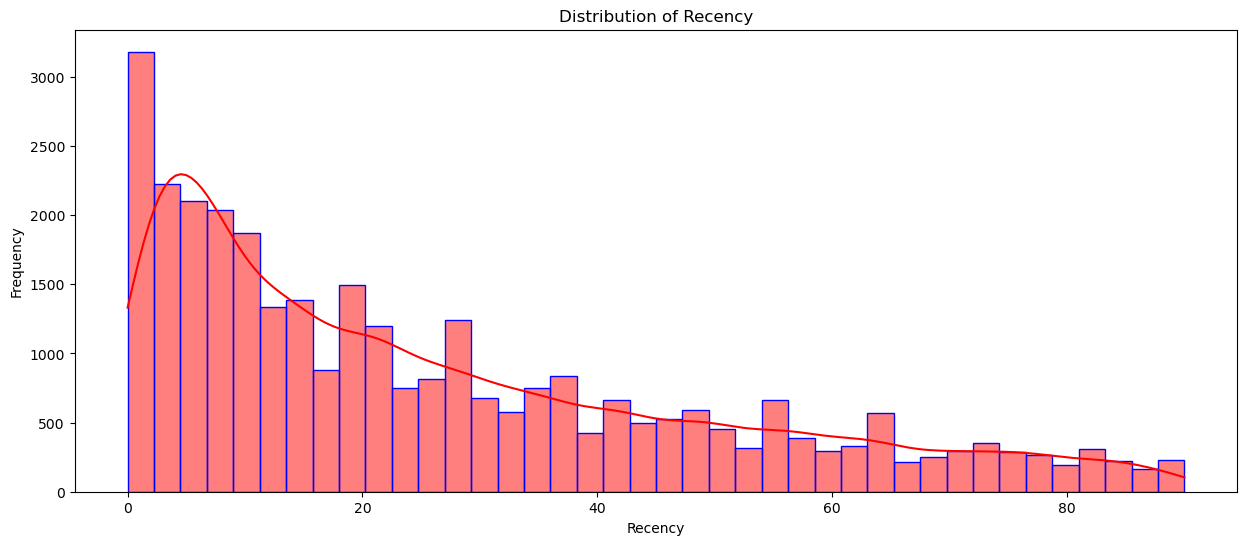

In [13]:
plt.figure(figsize=(15, 6))  

sns.histplot(df['Recency'], bins=40, kde=True, color='red', edgecolor='blue', line_kws={'color': 'green'})

 
# Adding labels and title
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Distribution of Recency')
 
# Display the plot
plt.show()

As we can conclude from the figure, the recency of our customers shows a favorable distribution. There are significantly more customers who have made orders recently compared to those who haven't placed an order in several days.
Note: Shorter recency could indicate more recent engagement, but it doesn't tell us how often they purchase or how much they spend.

In [14]:
grouped_1 = df.groupby('Recency')['value_freq'].mean().reset_index()
grouped_1.dropna(inplace=True)

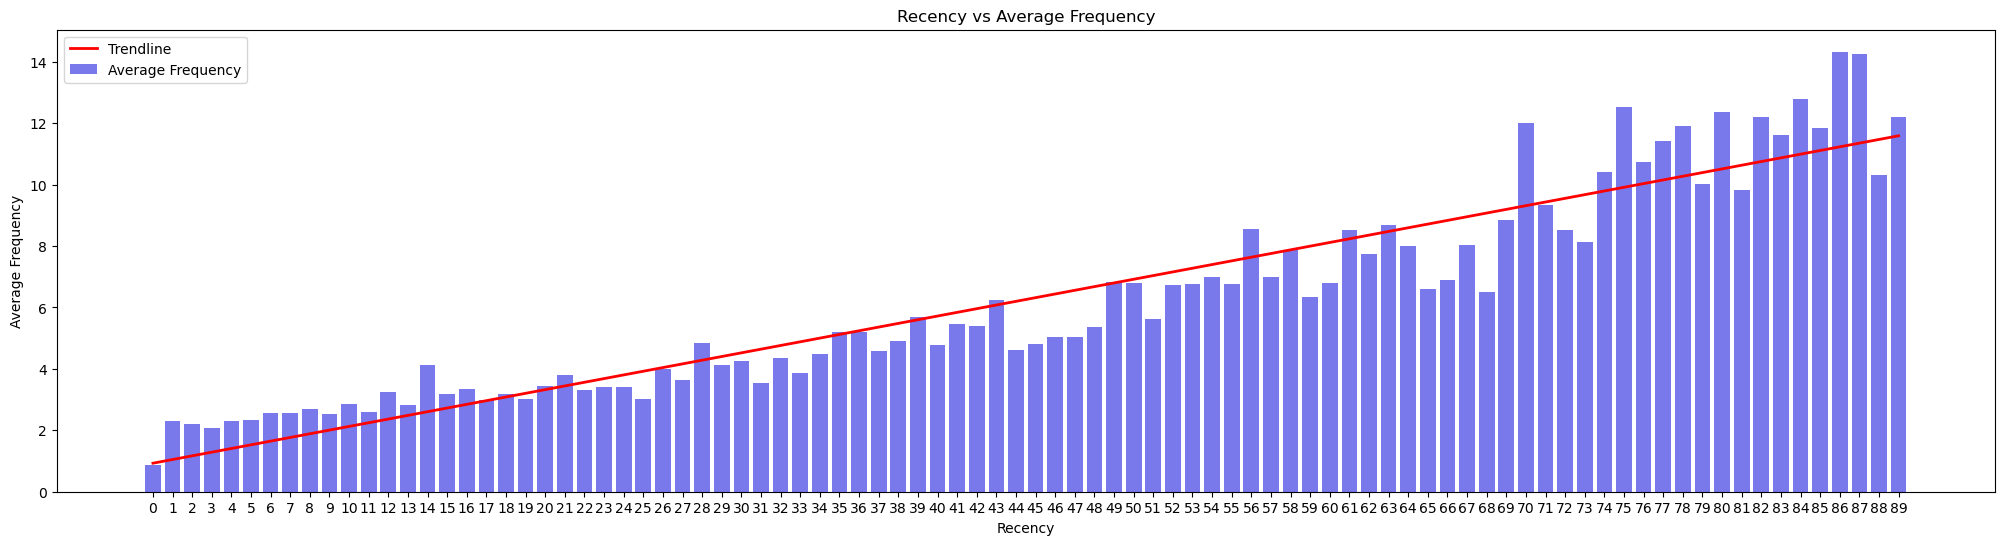

In [15]:
# Create the figure
plt.figure(figsize=(25, 6))

# Bar plot for average frequency per recency
sns.barplot(x='Recency', y='value_freq', data=grouped_1, color='blue', alpha=0.6, label='Average Frequency')

# Calculate trendline
x = grouped_1['Recency']
y = grouped_1['value_freq']

# Fit a linear trendline
z = np.polyfit(x, y, 1)  # First degree polynomial (linear)
p = np.poly1d(z)

# Plot the trendline
plt.plot(x, p(x), color='red', linestyle='-', linewidth=2, label='Trendline')

# Adding labels and title
plt.xlabel('Recency')
plt.ylabel('Average Frequency')
plt.title('Recency vs Average Frequency')
plt.legend()

# Display the plot
plt.show()

In [16]:
grouped_2 = df.groupby('Recency')['tot_value_cui'].sum().reset_index()
grouped_2.dropna(inplace=True)
grouped_2

,Recency,tot_value_cui
0,0,1117.36
1,1,122594.35
2,2,97043.56
3,3,74414.84
4,4,61775.17
...,...,...
86,86,1345.59
87,87,1441.37
88,88,770.21
89,89,712.42


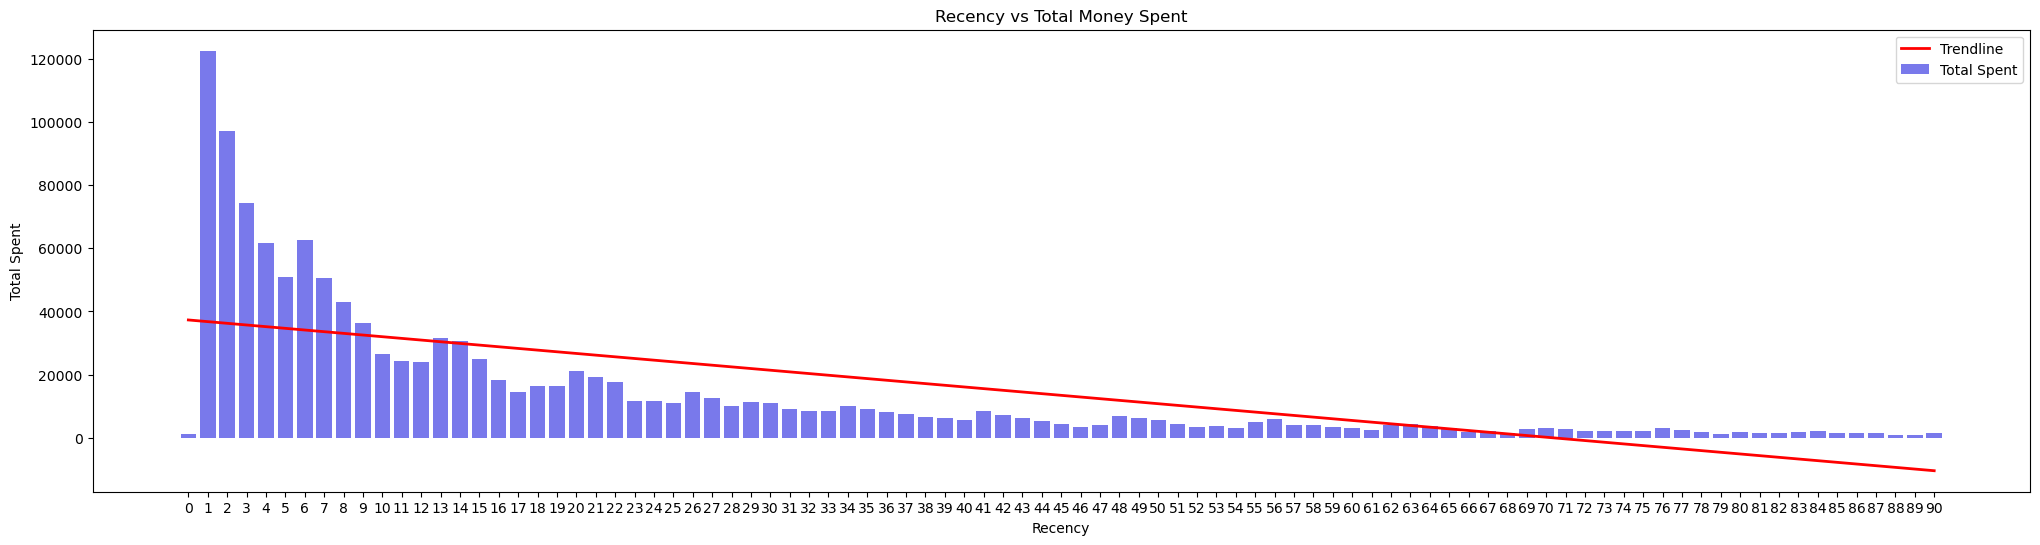

In [17]:
# Create the figure
plt.figure(figsize=(25, 6))

# Bar plot for average frequency per recency
sns.barplot(x='Recency', y='tot_value_cui', data=grouped_2, color='blue', alpha=0.6, label='Total Spent')

# Calculate trendline
x = grouped_2['Recency']
y = grouped_2['tot_value_cui']

# Fit a linear trendline
z = np.polyfit(x, y, 1)  # First degree polynomial (linear)
p = np.poly1d(z)

# Plot the trendline
plt.plot(x, p(x), color='red', linestyle='-', linewidth=2, label='Trendline')

# Adding labels and title
plt.xlabel('Recency')
plt.ylabel('Total Spent')
plt.title('Recency vs Total Money Spent')
plt.legend()

# Display the plot
plt.show()

We see that customers who haven’t purchased in a long time are, on average, those who buy more frequently, while customers who spend more money are those who have purchased more recently.

Customers who haven't purchased recently may represent a churn risk, indicating that they have the potential to become inactive even if they previously had a high frequency of purchases.

Customers who spend more money tend to be recent purchasers, suggesting that encouraging repeat purchases from this group could be more profitable.

The data indicates a need for targeted engagement strategies to re-activate older customers who may have stopped buying, as they may have previously been frequent buyers.

In [18]:
grouped_df = df.groupby(['Recency']).agg({'delta_day_order':'mean', 'tot_value_cui': 'mean'}).reset_index()
grouped_df

,Recency,delta_day_order,tot_value_cui
0,0,58.156250,34.917500
1,1,61.576856,71.650701
2,2,60.197497,67.485090
3,3,59.181122,63.277925
4,4,56.462715,59.058480
...,...,...,...
86,86,1.538462,17.251154
87,87,1.341176,16.957294
88,88,1.171875,12.034531
89,89,1.053571,12.721786


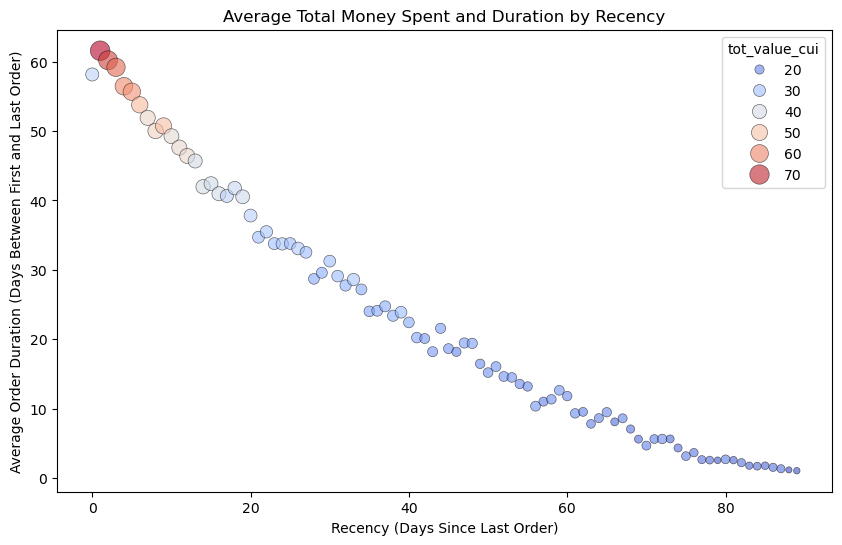

In [19]:
# Create the figure
plt.figure(figsize=(10, 6))

# Create a scatter plot (bubble plot) with averages of Total Money Spent
sns.scatterplot(
    x='Recency', 
    y='delta_day_order', 
    size='tot_value_cui',  # Bubble size based on the average money spent
    hue='tot_value_cui',  # Optional: Color based on average money spent
    data=grouped_df, 
    sizes=(20, 200),  # Control bubble size range
    palette='coolwarm',  # Color palette
    alpha=0.6,  # Transparency
    edgecolor="black"  # Border color of bubbles
)

# Adding labels and title
plt.xlabel('Recency (Days Since Last Order)')
plt.ylabel('Average Order Duration (Days Between First and Last Order)')
plt.title('Average Total Money Spent and Duration by Recency')

# Show the plot
plt.show()

Customers who haven't purchased for a long time on average tend to have a longer loyalty period, and they also spend the most on average. On the other hand, customers who haven't purchased in a long time are those who spend the least on average and also have the shortest loyalty period.

Long-term Loyalty and High Spending: Customers with a long period of inactivity but who have been loyal for a long time are likely high-value customers. They may represent valuable long-term relationships that businesses should try to re-engage. They spend more on average, so targeted efforts to bring them back could be worthwhile.

Churn Risk for Inactive Customers: The second group—those who haven’t purchased in a long time and have a short loyalty period—are more likely at risk of churn. They haven't established a strong relationship with the brand, and their lower spending suggests they are less engaged overall. These customers might require different strategies, such as incentives or personalized offers, to boost their loyalty.

The distinction between these two groups suggests that different engagement tactics should be employed. High-value, long-term customers might respond well to exclusive offers or personalized reactivation campaigns, while newer, less-engaged customers might need more aggressive promotions or educational efforts to boost their interest and commitment.

### Lets add the delta_day_order to the equation

We know the last time the clients bought a product, but that doesnt mean they are not going to buy again. So you are also analyse the their time with the company 

In [20]:
grouped_df2 = df.groupby(['Recency']).agg({'delta_day_order':'mean', 'order_freq': 'mean'}).reset_index()
grouped_df2

,Recency,delta_day_order,order_freq
0,0,58.156250,0.242152
1,1,61.576856,0.291525
2,2,60.197497,0.281032
3,3,59.181122,0.257863
4,4,56.462715,0.281460
...,...,...,...
86,86,1.538462,1.412179
87,87,1.341176,1.399020
88,88,1.171875,1.156250
89,89,1.053571,1.294643


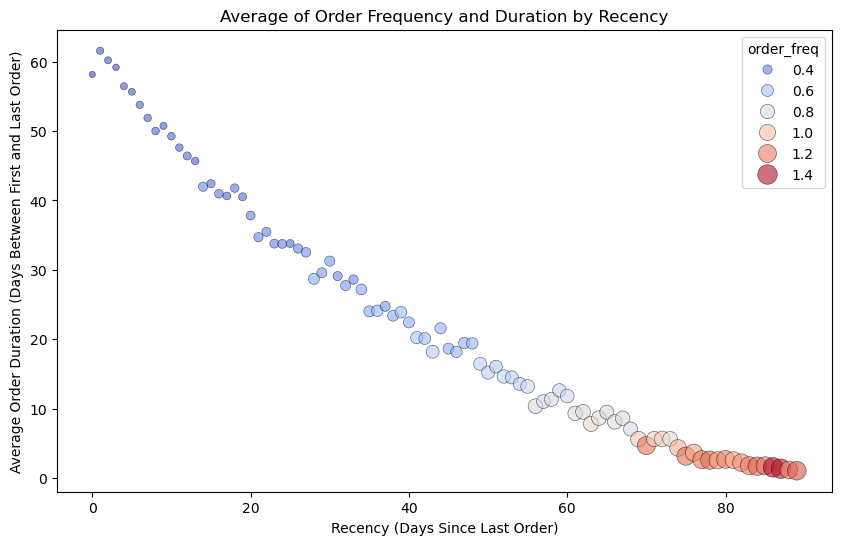

In [21]:
# Create the figure
plt.figure(figsize=(10, 6))

# Create a scatter plot (bubble plot) with averages of Total Money Spent
sns.scatterplot(
    x='Recency', 
    y='delta_day_order', 
    size='order_freq',  # Bubble size based on the average money spent
    hue='order_freq',  # Optional: Color based on average money spent
    data=grouped_df2, 
    sizes=(20, 200),  # Control bubble size range
    palette='coolwarm',  # Color palette
    alpha=0.6,  # Transparency
    edgecolor="black"  # Border color of bubbles
)

# Adding labels and title
plt.xlabel('Recency (Days Since Last Order)')
plt.ylabel('Average Order Duration (Days Between First and Last Order)')
plt.title('Average of Order Frequency and Duration by Recency')

# Show the plot
plt.show()

Customers who haven’t purchased for a long time tend to have a shorter loyalty period on average, but during that short loyalty period, they place orders more frequently

## Conclusion

Customers who haven't placed an order in a long time generally have shorter loyalty periods, spend less money, but place orders more frequently. In other words, within their shorter loyalty period, they place orders more often.

Customers who have placed orders more recently, on average, have longer loyalty periods, spend more money, and place orders less frequently.

##### Key Insights (Summary):

Short loyalty periods: These customers place orders more frequently but tend to spend less and have a shorter relationship with the company.

Long loyalty periods: These customers place orders less frequently but spend more and maintain a longer-lasting relationship with the company.

Inverse relationship: Frequency of orders tends to decrease as customer loyalty and spending increase.

